In [11]:
#Check the enviroment that Jupyter is using:
#import sys
#sys.executable

#NOTE on scikit-learn: Is used for typical Machine Learning Algorihms and not Deep-learning.

import numpy
#Machine learning library:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#Image processing library:
from skimage import io, color
'''
Note on Tensorflow: Uses Nvidia drivers and CUDA for parallel execution: https://developer.nvidia.com/cuda-toolkit
Else Tensorflow will fall back using the CPU.
Also: We can use cuDNN for GPU acceleration: 
https://developer.nvidia.com/cudnn
'''
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
#Plotting library:
import matplotlib.pyplot as plt
#CSV handler: https://docs.python.org/3/library/csv.html 
import csv
#Web handler: https://pypi.org/project/requests/
import requests 
#Pillow library for images: https://pypi.org/project/Pillow/
from PIL import Image
#BytesIO: https://docs.python.org/3/library/io.html
from io import BytesIO

In [54]:
dataset_verified = []  
dataset_non_verified = []
verified_labels = [
    "dime.find.process.accessioned",
    "dime.find.process.appraised",
    "dime.find.process.evaluated",
    "dime.find.process.finished",
    "dime.find.process.evaluated",
    "dime.find.process.finished"
]
non_verified_labels = [
    "dime.find.process.discarded",
    "dime.find.process.handed-in",
    "dime.find.process.inactive",
    "dime.find.process.not-appraised",
    "dime.find.process.old-recording",
    "dime.find.process.queried",
    "dime.find.process.received-museum",
    "dime.find.process.recorded",
    "dime.find.process.rejected",
    "dime.find.process.released",
    "dime.find.process.replied",
    "dime.find.process.reported",
    "dime.find.process.requested",
    "dime.find.process.shared"
]

#TODO: Fill with denars and other "coin" types.
artefact_identity_labels = [
    "dime.find.coin",
    
]

#Open CSV file for reading and filter for evaluated artefacts: 
with open('DIME billeder.csv', mode='r', newline='') as csv_file:
    csv_reader = csv.DictReader(csv_file, delimiter=';')

    #Extract URL and Process fields:
    for row in csv_reader:
        process = row['process']
        thesaurus = row['thesaurus']
        # Check if the process is in verified_labels or non_verified_labels
        if process in verified_labels or process in non_verified_labels:
            # Only include coins in the dataset
            if 'dime.find.coin' in thesaurus:
                url = row['URL']
                data_point = {'url': url, 'process': process}
                
                # Categorize the data point into the appropriate dataset
                if process in verified_labels:
                    dataset_verified.append(data_point)
                else:
                    dataset_non_verified.append(data_point)


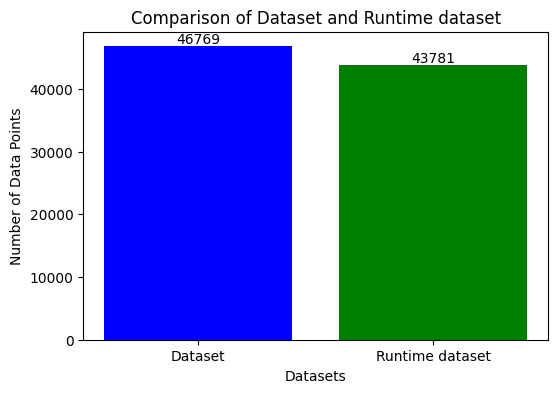

In [55]:
'''
Compare datasets. Training and Runtime dataset.
'''
#Length of each dataset:
num_dataset = len(dataset_verified)
num_validation_dataset = len(dataset_non_verified)
#Dataset for the chart:
datasets = ['Dataset', 'Runtime dataset']
num_data_points = [num_dataset, num_validation_dataset]
#Create barchart:
plt.figure(figsize=(6, 4))
plt.bar(datasets, num_data_points, color=['blue', 'green'])
plt.xlabel('Datasets')
plt.ylabel('Number of Data Points')
plt.title('Comparison of Dataset and Runtime dataset')
# Display the values on top of the bars
for i, v in enumerate(num_data_points):
    plt.text(i, v + 10, str(v), ha='center', va='bottom')

plt.show()

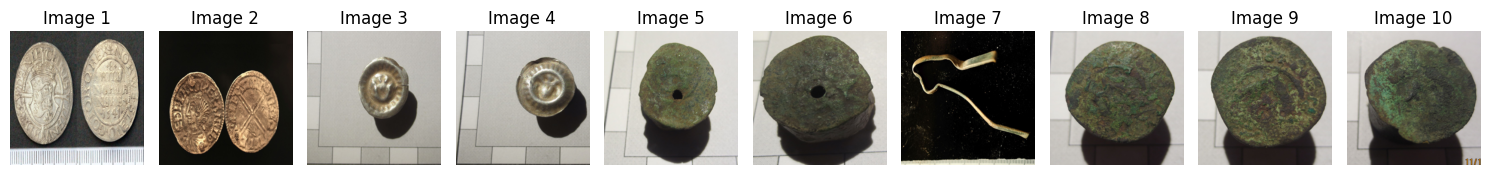

In [57]:
'''
Display the top 10 first images in our dataset. 
Test purpose:
'''
# Download and display the top 10 images
num_images_to_display = 10
#Create subplot
fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 5))  # Adjust the figure size as needed

for i, data_point in enumerate(dataset_verified[:num_images_to_display]):
    url = data_point['url']
    response = requests.get(url)
    
    if response.status_code == 200:
        img = Image.open(BytesIO(response.content))
        img = img.resize((224, 224))  # Resize the image as needed
        
        # Display the image in the corresponding subplot
        axes[i].imshow(img)
        axes[i].axis('off')  # Hide the axis for each subplot
        axes[i].set_title(f'Image {i + 1}')  # Set a title for each subplot. 
                #using f-string that evaluates expression inside and print.

plt.tight_layout()
plt.show()

In [ ]:
#TODO: https://www.tensorflow.org/tutorials/images/cnn#compile_and_train_the_model
